# Box-Cox transformation Demo
Using Random data, we generate a polynomial dataset with $x \in [0.1 , 10]$. 
Using the boxcox R function, we estimate the best box cox transform to get a straight data set. 
with the  `?boxcox`
command you will see what other parameters you can give the boxcox function. 
More information about Box-Cox transforms by Peng-Fei Li: https://www.ime.usp.br/~abe/lista/pdfm9cJKUmFZp.pdf
The original script (without randomization) can be found at https://www.statology.org/box-cox-transformation-in-r/

In [1]:
require(MASS)
#require(ggplot2)

Loading required package: MASS



In [2]:
#?runif
#?rdisc
n = rnorm(1,100,10)
r = rnorm(1,1,2)
x=runif(n,0.1,10)
y = 20+ x^r *(1+ rnorm(n,0,.3))
print(paste("polynomial: y = 20 +x^" , round(r,4), "+eps"))

[1] "polynomial: y = 20 +x^ -3.688 +eps"


[1] -3

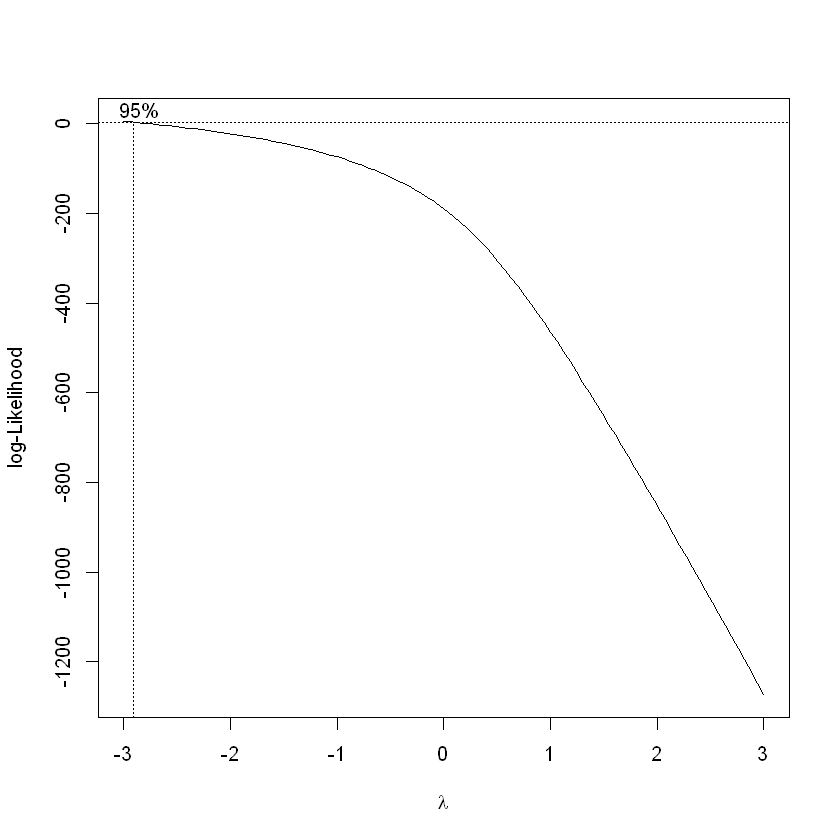

In [3]:
#find optimal lambda for Box-Cox transformation 
bc <- boxcox(y ~ x, lambda = seq(-3,3,0.1))
(lambda <- bc$x[which.max(bc$y)])
#fit new linear regression model using the Box-Cox transformation
new_model <- lm(((y^lambda-1)/lambda) ~ x)

### Fit linear regression models

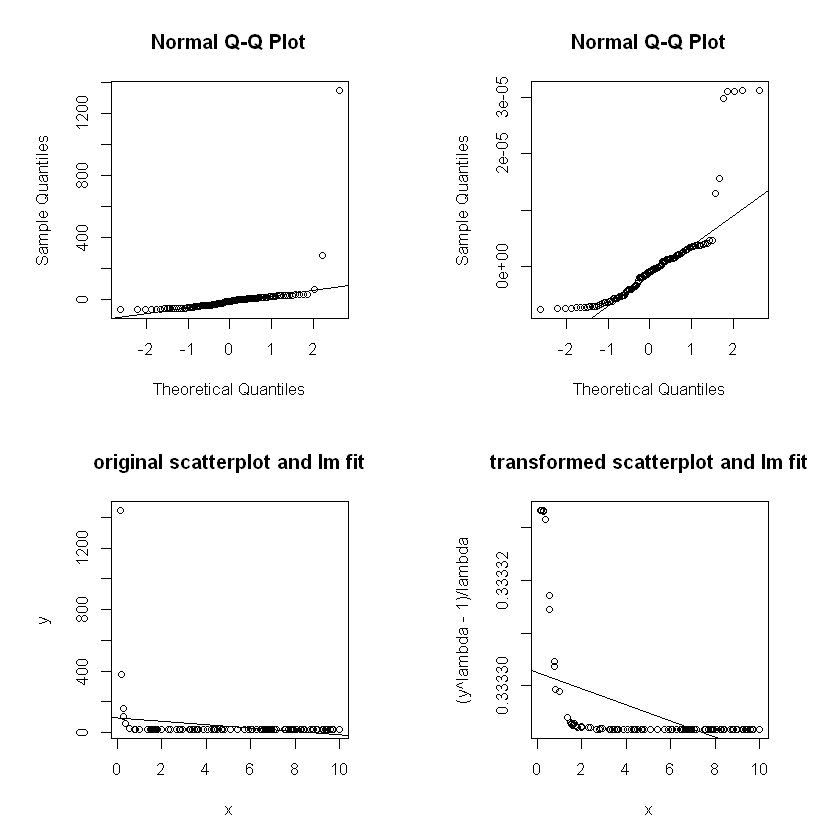

In [8]:
model <- lm(y~x)
#fit new linear regression model using the Box-Cox transformation
new_model <- lm(((y^lambda-1)/lambda) ~ x)
#define plotting area
op <- par(pty = "s", mfrow = c(2, 2))

#Q-Q plot for original model
qqnorm(model$residuals)
qqline(model$residuals)

#Q-Q plot for Box-Cox transformed model
qqnorm(new_model$residuals)
qqline(new_model$residuals)
plot(x,y)
title("original scatterplot and lm fit")
abline(model)
plot(x, (y^lambda-1)/lambda)
title("transformed scatterplot and lm fit")
abline(new_model)
#display all 4 plots
par(op)

Depending on the random exponent, the transformed data shows a much straighter QQ plot, showing that the dat ais more normal, and the right hand side Scatterplot has a more equal variation and is straighter around the line. (if the exponent is positive, it works well. if the exponent is negative, like -3, it doesnt work well.  

### A summary of the original and transformed models:

In [10]:
summary(model)
summary(new_model)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
 -64.65  -39.52   -9.49   10.55 1351.32 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   94.846     26.185   3.622 0.000444 ***
x            -10.825      4.382  -2.470 0.015030 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 136 on 110 degrees of freedom
Multiple R-squared:  0.05257,	Adjusted R-squared:  0.04395 
F-statistic: 6.103 on 1 and 110 DF,  p-value: 0.01503



Call:
lm(formula = ((y^lambda - 1)/lambda) ~ x)

Residuals:
       Min         1Q     Median         3Q        Max 
-7.671e-06 -5.274e-06 -8.724e-07  1.985e-06  3.124e-05 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  3.333e-01  1.535e-06 217115.668  < 2e-16 ***
x           -1.534e-06  2.569e-07     -5.973 2.92e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.975e-06 on 110 degrees of freedom
Multiple R-squared:  0.2449,	Adjusted R-squared:  0.238 
F-statistic: 35.68 on 1 and 110 DF,  p-value: 2.916e-08
